# Credit Card Fraud Detection

## Split and Save a Large File (DO NOT EXECUTE)

In [1]:
import pandas as pd
import numpy as np

INPUT_PATH = "input/creditcard.csv"
number_of_chunks = 3

df = pd.read_csv(INPUT_PATH)

split_df = np.array_split(df, number_of_chunks)

for id in range(0,len(split_df)):
    split_df[id].to_csv("input/creditcard_{}.csv".format(id), index=False)

del df, split_df

## Load Splitted Dataset

In [1]:
import zipfile

for id in range(0,3):
    with zipfile.ZipFile('input/creditcard_{}.csv.zip'.format(id), 'r') as zip_ref:
        zip_ref.extractall('input')

import pandas as pd

split_data = [] 
for id in range(0,3):
    split_data.append(pd.read_csv('input/creditcard_{}.csv'.format(id)))


df = pd.concat(split_data)

del split_data

df.shape

(284807, 31)

In [2]:
df.max()

Time      172792.000000
V1             2.454930
V2            22.057729
V3             9.382558
V4            16.875344
V5            34.801666
V6            73.301626
V7           120.589494
V8            20.007208
V9            15.594995
V10           23.745136
V11           12.018913
V12            7.848392
V13            7.126883
V14           10.526766
V15            8.877742
V16           17.315112
V17            9.253526
V18            5.041069
V19            5.591971
V20           39.420904
V21           27.202839
V22           10.503090
V23           22.528412
V24            4.584549
V25            7.519589
V26            3.517346
V27           31.612198
V28           33.847808
Amount     25691.160000
Class          1.000000
dtype: float64

In [3]:
df.min()

Time        0.000000
V1        -56.407510
V2        -72.715728
V3        -48.325589
V4         -5.683171
V5       -113.743307
V6        -26.160506
V7        -43.557242
V8        -73.216718
V9        -13.434066
V10       -24.588262
V11        -4.797473
V12       -18.683715
V13        -5.791881
V14       -19.214325
V15        -4.498945
V16       -14.129855
V17       -25.162799
V18        -9.498746
V19        -7.213527
V20       -54.497720
V21       -34.830382
V22       -10.933144
V23       -44.807735
V24        -2.836627
V25       -10.295397
V26        -2.604551
V27       -22.565679
V28       -15.430084
Amount      0.000000
Class       0.000000
dtype: float64

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df.isnull().sum().max()

0

In [7]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

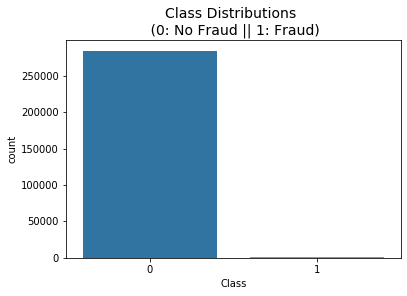

In [8]:
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [9]:
df.sort_index(axis=1).head(3)

,Amount,Class,Time,V1,V10,V11,V12,V13,V14,V15,...,V26,V27,V28,V3,V4,V5,V6,V7,V8,V9
0,149.62,0,0.0,-1.359807,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,...,-0.189115,0.133558,-0.021053,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787
1,2.69,0,0.0,1.191857,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,...,0.125895,-0.008983,0.014724,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425
2,378.66,0,1.0,-1.358354,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,...,-0.139097,-0.055353,-0.059752,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654


In [10]:
df.sort_index(axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Amount    284807 non-null float64
Class     284807 non-null int64
Time      284807 non-null float64
V1        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V2        284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26       284807 non-null float64
V27       284807 non-null float64
V28       284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5     

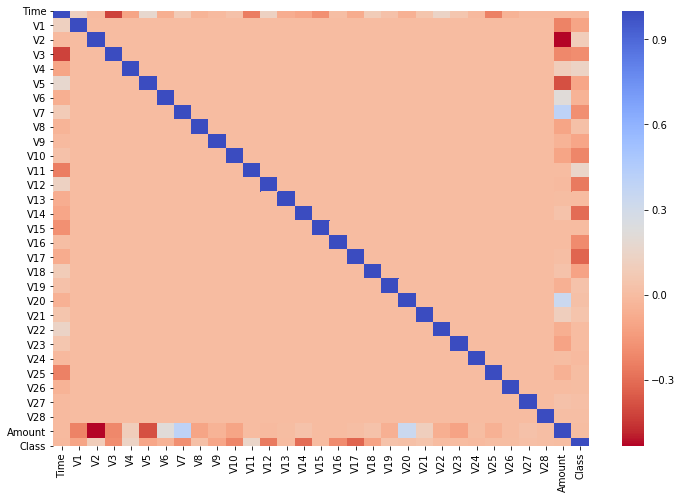

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm_r', annot=False)

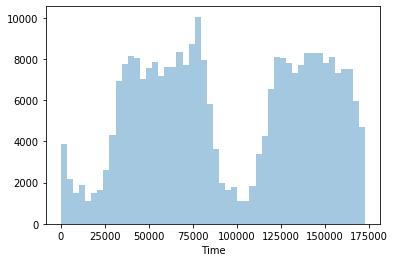

In [12]:
sns.distplot(df['Time'], kde=False)

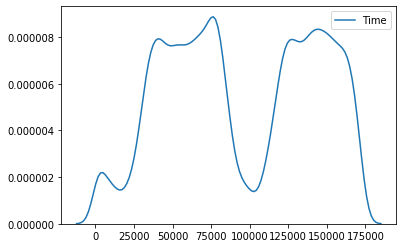

In [13]:
sns.kdeplot(df['Time'])

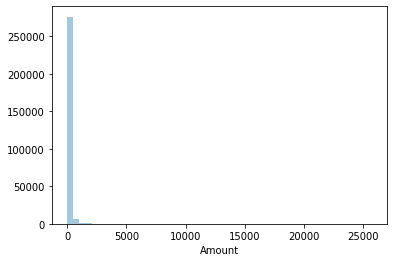

In [14]:
sns.distplot(df['Amount'], kde=False)

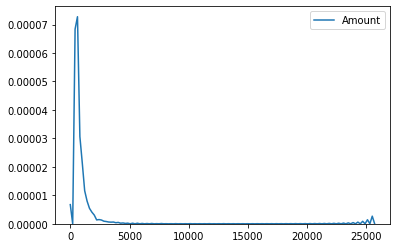

In [15]:
sns.kdeplot(df['Amount'])

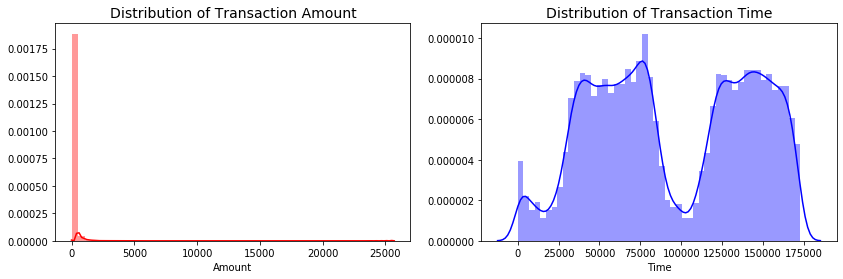

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))

sns.distplot(df['Amount'], ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)

sns.distplot(df['Time'], ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)

plt.show()

In [17]:
df[df["Amount"]==0].shape

(1825, 31)

In [18]:
df[df["Amount"]==0]["Class"].value_counts()

0    1798
1      27
Name: Class, dtype: int64

In [19]:
f_df = df[df['Class']==1]
n_df = df[df['Class']==0]

(f_df.shape, n_df.shape)

((492, 31), (284315, 31))

In [20]:
f_df.Amount.min(), f_df.Amount.max()

(0.0, 2125.87)

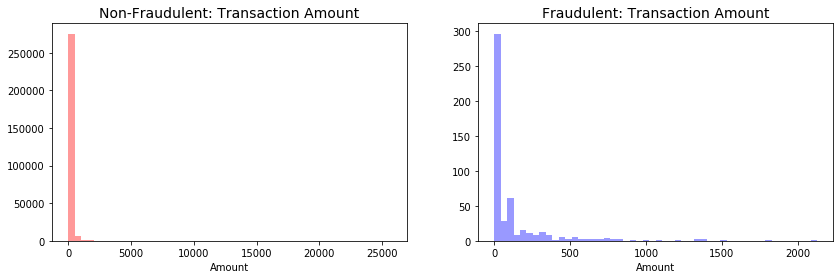

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))

sns.distplot(n_df['Amount'], kde=False, ax=ax[0], color='r')
ax[0].set_title('Non-Fraudulent: Transaction Amount', fontsize=14)

sns.distplot(f_df['Amount'], kde=False, ax=ax[1], color='b')
ax[1].set_title('Fraudulent: Transaction Amount', fontsize=14)

plt.show()

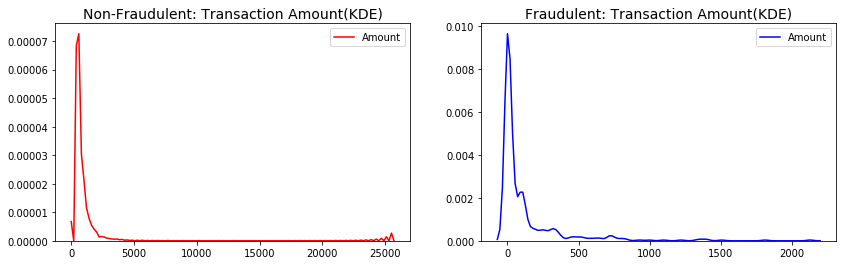

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))

sns.kdeplot(n_df['Amount'], ax=ax[0], color='r')
ax[0].set_title('Non-Fraudulent: Transaction Amount(KDE)', fontsize=14)

sns.kdeplot(f_df['Amount'], ax=ax[1], color='b')
ax[1].set_title('Fraudulent: Transaction Amount(KDE)', fontsize=14)

plt.show()

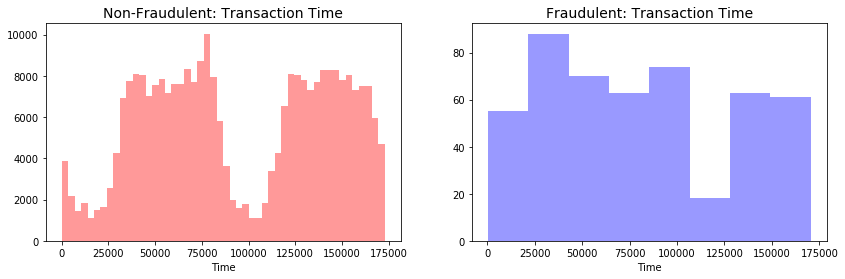

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))

sns.distplot(n_df['Time'], kde=False, ax=ax[0], color='r')
ax[0].set_title('Non-Fraudulent: Transaction Time', fontsize=14)

sns.distplot(f_df['Time'], kde=False, ax=ax[1], color='b')
ax[1].set_title('Fraudulent: Transaction Time', fontsize=14)

plt.show()

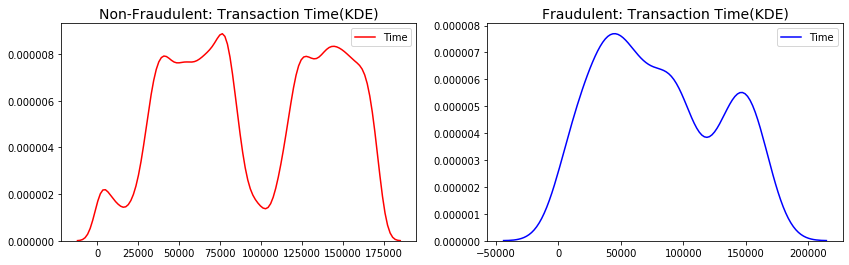

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))

sns.kdeplot(n_df['Time'], ax=ax[0], color='r')
ax[0].set_title('Non-Fraudulent: Transaction Time(KDE)', fontsize=14)

sns.kdeplot(f_df['Time'], ax=ax[1], color='b')
ax[1].set_title('Fraudulent: Transaction Time(KDE)', fontsize=14)

plt.show()

In [25]:
df[['Time','Amount']].groupby(['Time']).head()

,Time,Amount
0,0.0,149.62
1,0.0,2.69
2,1.0,378.66
3,1.0,123.50
4,2.0,69.99
...,...,...
284802,172786.0,0.77
284803,172787.0,24.79
284804,172788.0,67.88
284805,172788.0,10.00


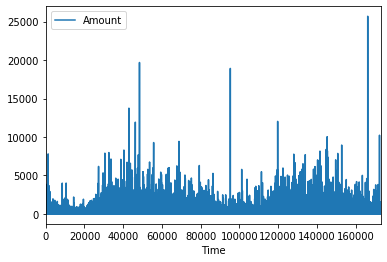

In [26]:
df[['Time','Amount']].groupby(['Time']).sum().plot()

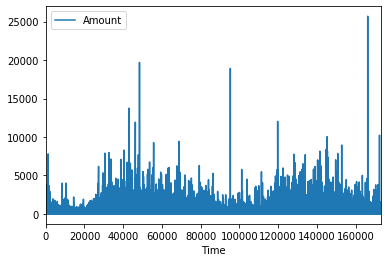

In [27]:
n_df[['Time','Amount']].groupby(['Time']).sum().plot()

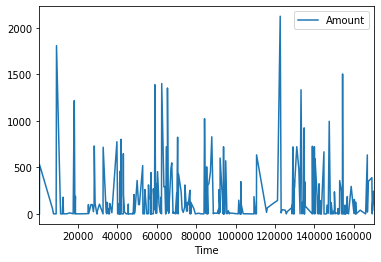

In [28]:
f_df[['Time','Amount']].groupby(['Time']).sum().plot()

In [29]:
print("Entire Dataset: " + str(df.Amount.sum()))
print("Non-Fraudulent Dataset: " + str(n_df.Amount.sum()))
print("Fraudulent Dataset: " + str(f_df.Amount.sum()))

Entire Dataset: 25162590.009999998
Non-Fraudulent Dataset: 25102462.04
Fraudulent Dataset: 60127.97


In [30]:
df.drop(df[df.Amount == 0].index, inplace=True)
n_df = df[df["Class"]==0]
f_df = df[df["Class"]==1]
(df.shape, n_df.shape, f_df.shape)

((282982, 31), (282517, 31), (465, 31))

In [31]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

df['scaled_amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [32]:
def compare_kde(col1, col2, name):
    fig, ax = plt.subplots(2, 2, figsize=(16,7))
    sns.kdeplot(df[df['Class']==0]['Amount'], ax=ax[0][0], color='r')
    ax[0][0].set_title('Non-Fraudulent: Transaction Amount(Original)', fontsize=12)
    sns.kdeplot(df[df['Class']==1]['Time'], ax=ax[0][1], color='b')
    ax[0][1].set_title('Fraudulent: Transaction Time(Original)', fontsize=12)
    sns.kdeplot(df[df['Class']==0][col1], ax=ax[1][0], color='r')
    ax[1][0].set_title('Non-Fraudulent: Transaction Amount('+ name +')', fontsize=12)
    sns.kdeplot(df[df['Class']==1][col2], ax=ax[1][1], color='b')
    ax[1][1].set_title('Fraudulent: Transaction Time('+ name +')', fontsize=12)
    plt.show()

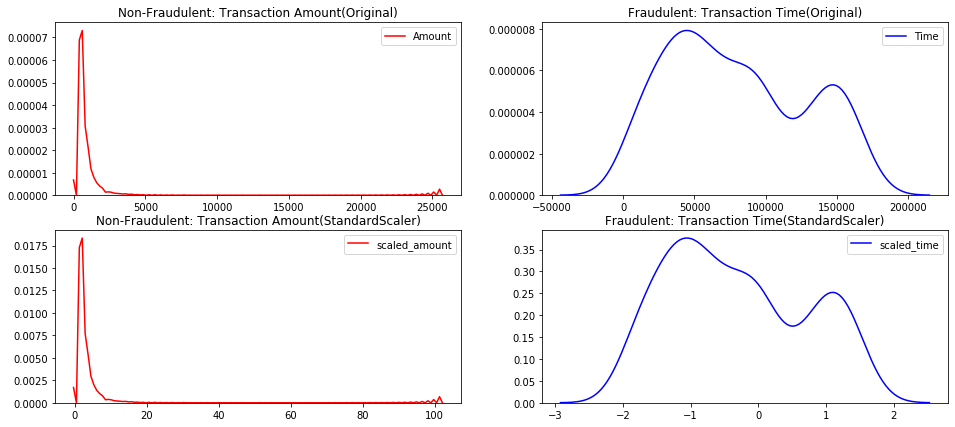

In [33]:
compare_kde('scaled_amount', 'scaled_time', 'StandardScaler')

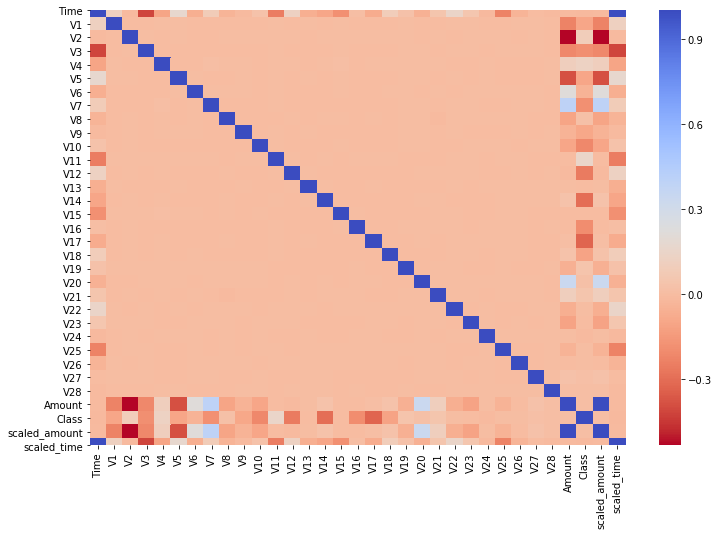

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm_r', annot=False)

In [35]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df['robust_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['robust_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

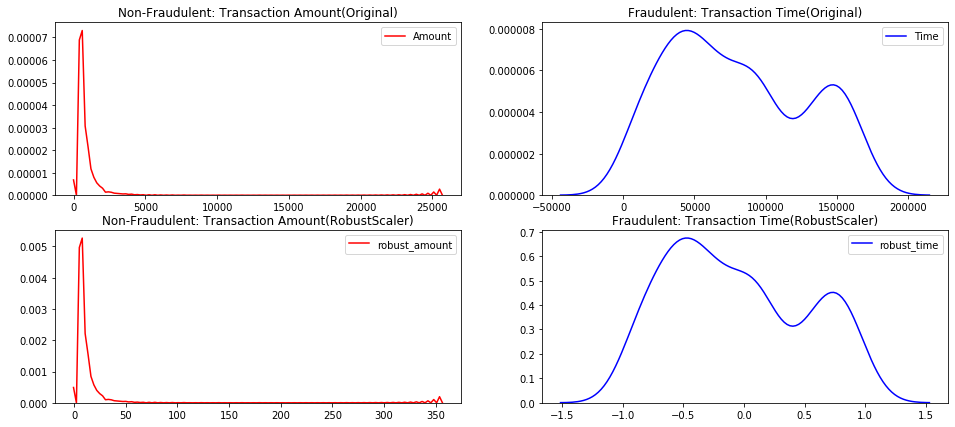

In [36]:
compare_kde("robust_amount", "robust_time", "RobustScaler")

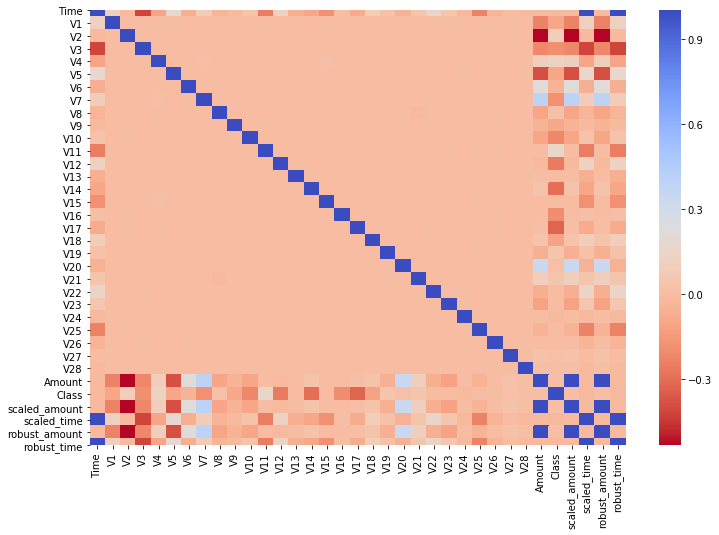

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),  cmap='coolwarm_r', annot=False)

In [38]:
from sklearn.preprocessing import PowerTransformer

p_trans = PowerTransformer()

df['ptrans_amount'] = p_trans.fit_transform(df['Amount'].values.reshape(-1,1))
df['ptrans_time'] = p_trans.fit_transform(df['Time'].values.reshape(-1,1))

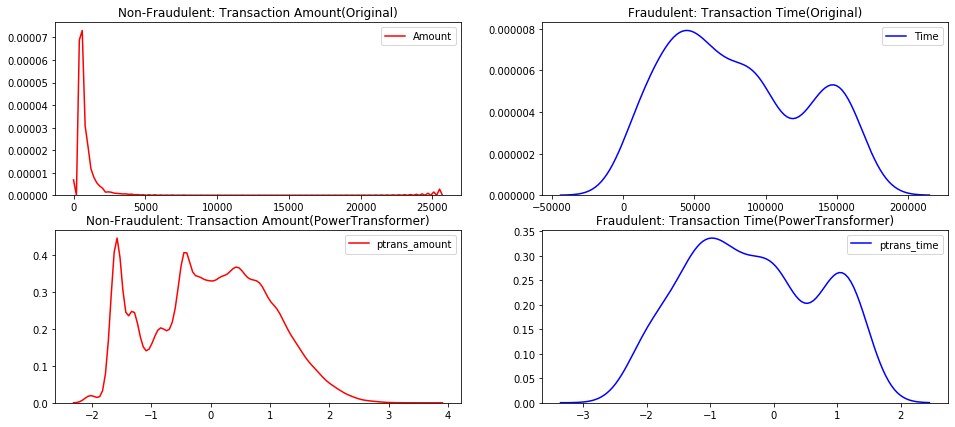

In [39]:
compare_kde("ptrans_amount", "ptrans_time", "PowerTransformer")

In [40]:
from sklearn.preprocessing import QuantileTransformer

q_trans = QuantileTransformer(output_distribution="normal")

df['qtransn_amount'] = q_trans.fit_transform(df['Amount'].values.reshape(-1,1))
df['qtransn_time'] = q_trans.fit_transform(df['Time'].values.reshape(-1,1))

q_trans = QuantileTransformer(output_distribution="uniform")

df['qtransu_amount'] = q_trans.fit_transform(df['Amount'].values.reshape(-1,1))
df['qtransu_time'] = q_trans.fit_transform(df['Time'].values.reshape(-1,1))

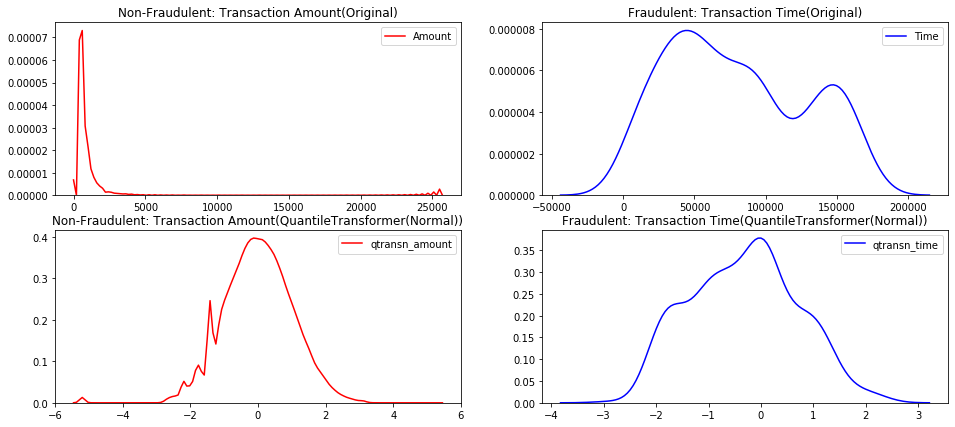

In [41]:
compare_kde("qtransn_amount", "qtransn_time", "QuantileTransformer(Normal)")

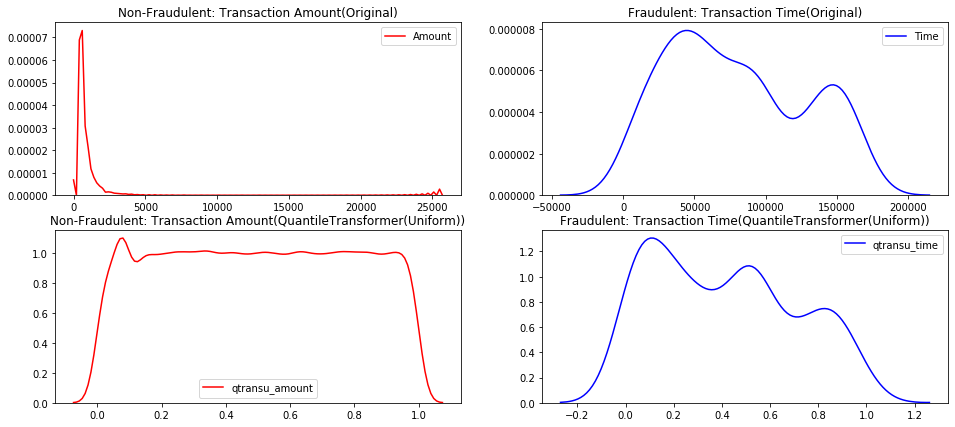

In [42]:
compare_kde("qtransu_amount", "qtransu_time", "QuantileTransformer(Uniform)")

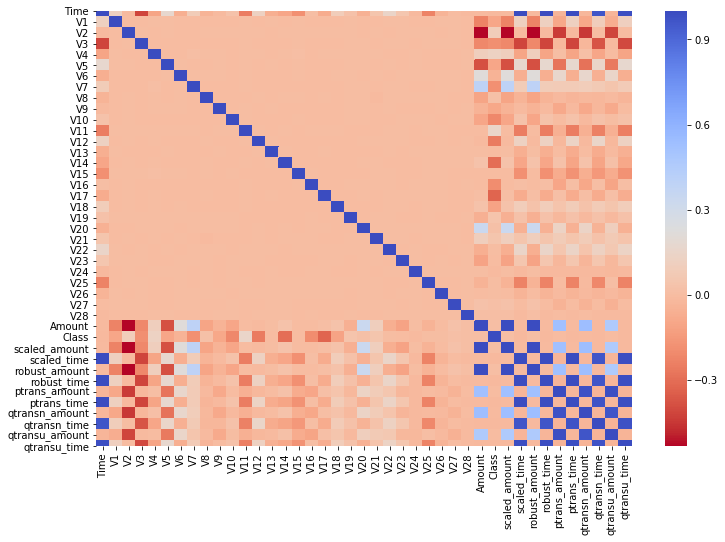

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),  cmap='coolwarm_r', annot=False)

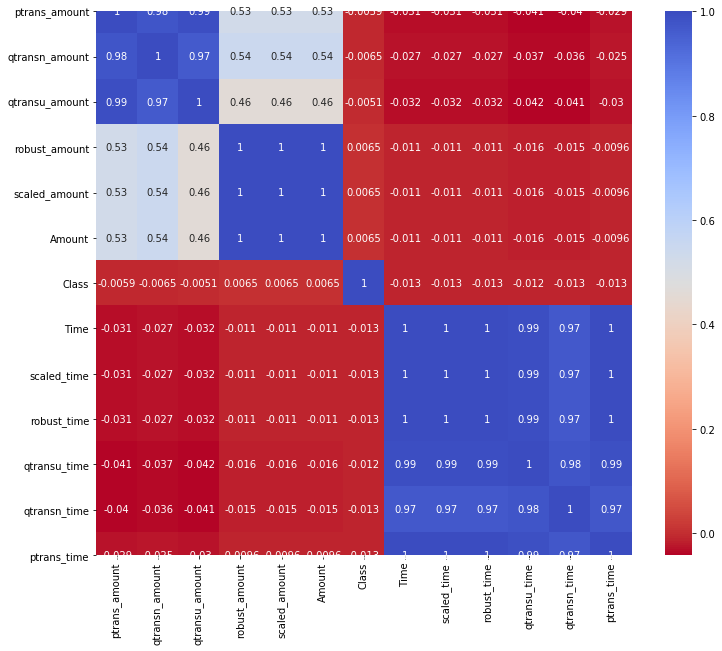

In [44]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[["ptrans_amount","qtransn_amount","qtransu_amount", 
                "robust_amount","scaled_amount","Amount",
                "Class", "Time", 'scaled_time',"robust_time", 
                "qtransu_time", "qtransn_time","ptrans_time"]].corr(),  
            cmap='coolwarm_r', annot=True)

In [45]:
df[["Amount", 'scaled_amount',"robust_amount", 
    "qtransu_amount", "qtransn_amount","ptrans_amount"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,282982.0,8.891940e+01,250.824374,0.010000,5.990000,22.490000,78.000000,25691.160000
scaled_amount,282982.0,3.586570e-15,1.000002,-0.354469,-0.330628,-0.264845,-0.043534,102.072560
robust_amount,282982.0,9.225024e-01,3.483188,-0.312179,-0.229135,0.000000,0.770865,356.459797
qtransu_amount,282982.0,5.003332e-01,0.288817,0.000000,0.251251,0.500559,0.750774,1.000000
qtransn_amount,282982.0,-3.401245e-03,1.019338,-5.199338,-0.670557,-0.000869,0.673945,5.199338
ptrans_amount,282982.0,2.142510e-14,1.000002,-2.050775,-0.733013,0.030784,0.750683,3.649005


In [46]:
df[["Time", 'scaled_time',"robust_time", 
    "qtransu_time", "qtransn_time","ptrans_time"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Time,282982.0,9.484896e+04,47482.459589,0.000000,54251.250000,84707.500000,139363.750000,172792.000000
scaled_time,282982.0,6.155099e-15,1.000002,-1.997561,-0.855006,-0.213584,0.937501,1.641515
robust_time,282982.0,1.191536e-01,0.557879,-0.995242,-0.357835,0.000000,0.642165,1.034918
qtransu_time,282982.0,5.002770e-01,0.288876,0.000000,0.250130,0.499640,0.750213,1.000000
qtransn_time,282982.0,-6.257126e-03,0.999514,-5.199338,-0.679166,-0.004836,0.669936,5.199338
ptrans_time,282982.0,1.981191e-14,1.000002,-2.436283,-0.809483,-0.143207,0.928790,1.534947


In [47]:
from sklearn.model_selection import train_test_split
import numpy as np

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('\nLabel Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_train))
print("\nTrain:")
print('No Frauds', round(len(y_train[y_train==0])/len(X_train) * 100,2), '% of the dataset')
print('Frauds', round(len(y_train[y_train==1])/len(X_train) * 100,2), '% of the dataset')
print("\nTest:")
print('No Frauds', round(len(y_test[y_test==0])/len(X_test) * 100,2), '% of the dataset')
print('Frauds', round(len(y_test[y_test==1])/len(X_test) * 100,2), '% of the dataset')

No Frauds 99.84 % of the dataset
Frauds 0.16 % of the dataset

Label Distributions: 

[0.99830377 0.00169623]
[0.24964552 0.0003578 ]

Train:
No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset

Test:
No Frauds 99.86 % of the dataset
Frauds 0.14 % of the dataset


In [48]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('\nLabel Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_train))
print("\nTrain:")
print('No Frauds', round(len(y_train[y_train==0])/len(X_train) * 100,2), '% of the dataset')
print('Frauds', round(len(y_train[y_train==1])/len(X_train) * 100,2), '% of the dataset')
print("\nTest:")
print('No Frauds', round(len(y_test[y_test==0])/len(X_test) * 100,2), '% of the dataset')
print('Frauds', round(len(y_test[y_test==1])/len(X_test) * 100,2), '% of the dataset')

No Frauds 99.84 % of the dataset
Frauds 0.16 % of the dataset

Label Distributions: 

[0.99835875 0.00164125]
[0.1109257  0.00018454]

Train:
No Frauds 99.84 % of the dataset
Frauds 0.16 % of the dataset

Test:
No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [49]:
len(y_train[y_train==1])

418

# Re-sampling

In [50]:
train_df = X_train.copy()
train_df['Class'] = y_train
train_df.shape

(254684, 41)

In [51]:
train_df['Class'].value_counts()

0    254266
1       418
Name: Class, dtype: int64

In [52]:
def plot_2d_space(X, y, label='Class'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

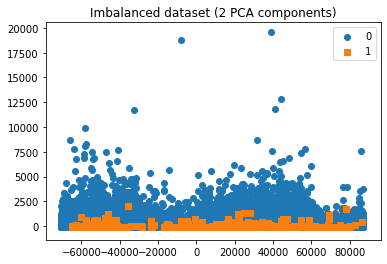

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X_train)

plot_2d_space(X, y_train, 'Imbalanced dataset (2 PCA components)')

# Random Undersampling

In [54]:
# Class count
count_class_0, count_class_1 = train_df.Class.value_counts()

# Divide by class
train_df_0 = train_df[train_df['Class'] == 0]
train_df_1 = train_df[train_df['Class'] == 1]

Random under-sampling:
1    418
0    418
Name: Class, dtype: int64


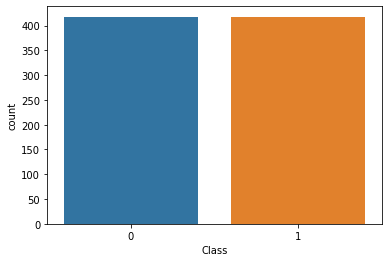

In [55]:
train_df_0_under = train_df_0.sample(count_class_1)
train_df_under = pd.concat([train_df_0_under, train_df_1], axis=0)

print('Random under-sampling:')
print(train_df_under.Class.value_counts())

sns.countplot('Class', data=train_df_under)

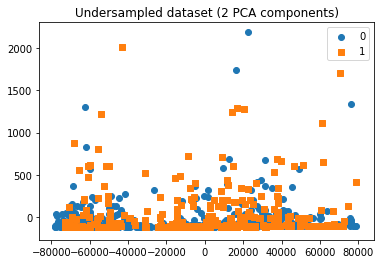

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(train_df_under.drop(columns=["Class"]))

plot_2d_space(X, train_df_under["Class"], 'Undersampled dataset (2 PCA components)')

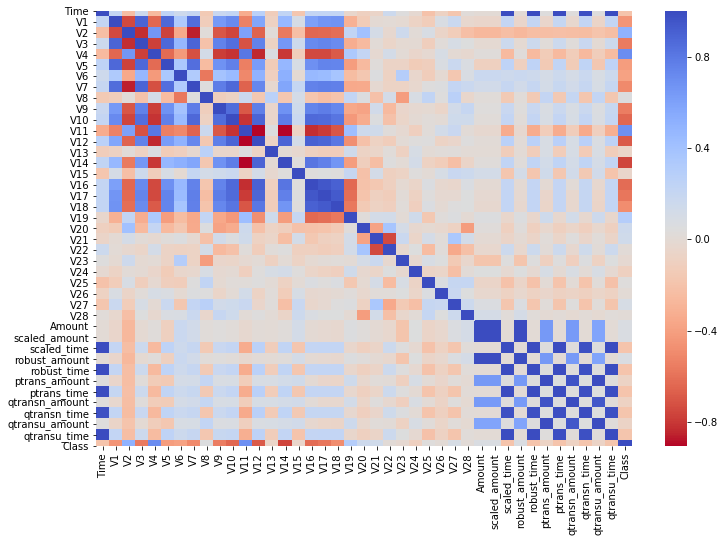

In [57]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df_under.corr(),  cmap='coolwarm_r', annot=False)

# Random Oversampling

Random over-sampling:
1    254266
0    254266
Name: Class, dtype: int64


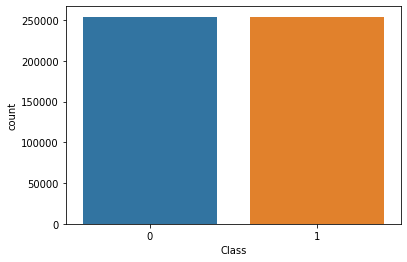

In [58]:
train_df_1_over = train_df_1.sample(count_class_0, replace=True)
train_df_over = pd.concat([train_df_0, train_df_1_over], axis=0)

print('Random over-sampling:')
print(train_df_over.Class.value_counts())

sns.countplot('Class', data=train_df_over)

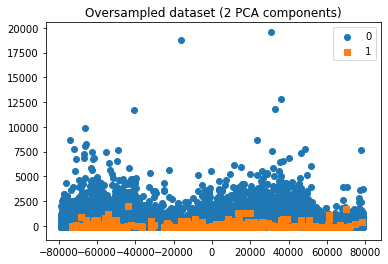

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(train_df_over.drop(columns=["Class"]))

plot_2d_space(X, train_df_over["Class"], 'Oversampled dataset (2 PCA components)')

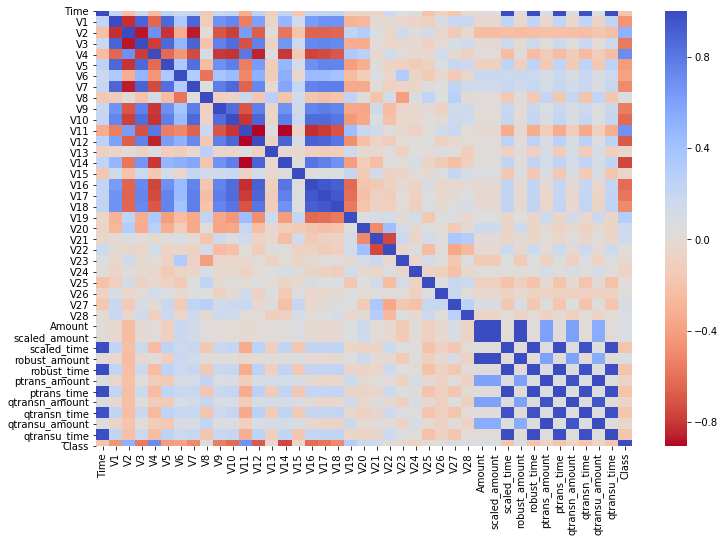

In [60]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df_over.corr(),  cmap='coolwarm_r', annot=False)

# Tomek Links

Tomek links under-sampling:
0    254204
1       418
Name: Class, dtype: int64


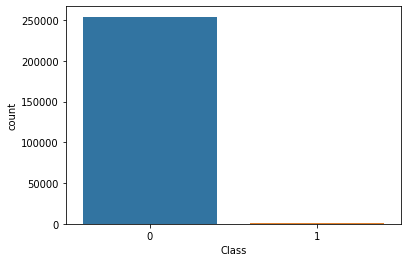

In [61]:
from imblearn.under_sampling import TomekLinks

tkl = TomekLinks(sampling_strategy='auto', n_jobs=-1)
X_tl, y_tl = tkl.fit_sample(X_train, y_train)

train_df_tkl = X_tl
train_df_tkl['Class'] = y_tl

print('Tomek links under-sampling:')
print(train_df_tkl.Class.value_counts())
sns.countplot('Class', data=train_df_tkl)

In [62]:
train_df.shape[0] - train_df_tkl.shape[0]

62

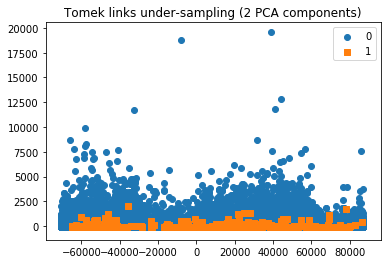

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(train_df_tkl.drop(columns=["Class"]))

plot_2d_space(X, train_df_tkl["Class"], 'Tomek links under-sampling (2 PCA components)')

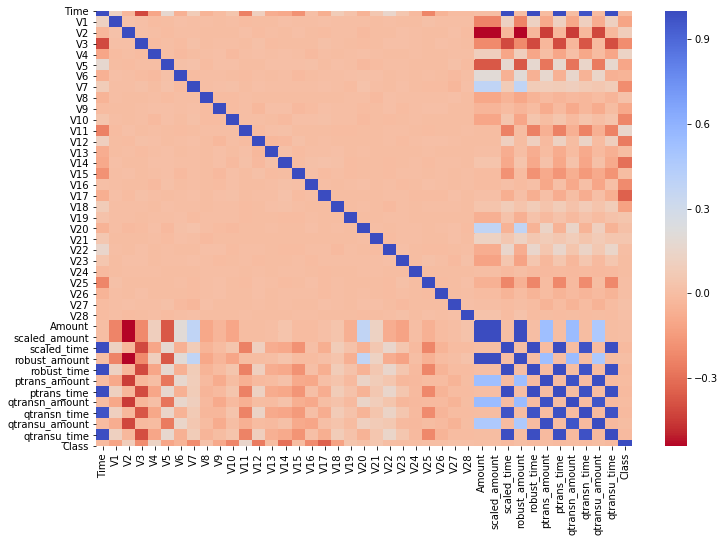

In [64]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df_tkl.corr(),  cmap='coolwarm_r', annot=False)

# SMOTE

SMOTE over-sampling:
1    254266
0    254266
Name: Class, dtype: int64


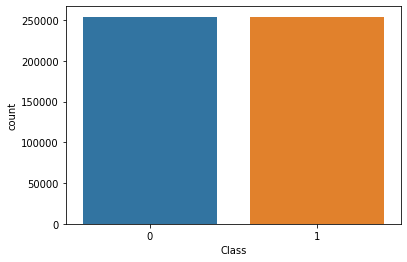

In [65]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_sm, y_sm = sm.fit_sample(X_train, y_train)

train_df_sm = X_sm
train_df_sm['Class'] = y_sm

print('SMOTE over-sampling:')
print(train_df_sm.Class.value_counts())
sns.countplot('Class', data=train_df_sm)

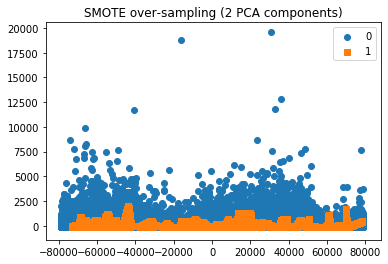

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(train_df_sm.drop(columns=["Class"]))

plot_2d_space(X, train_df_sm["Class"], 'SMOTE over-sampling (2 PCA components)')

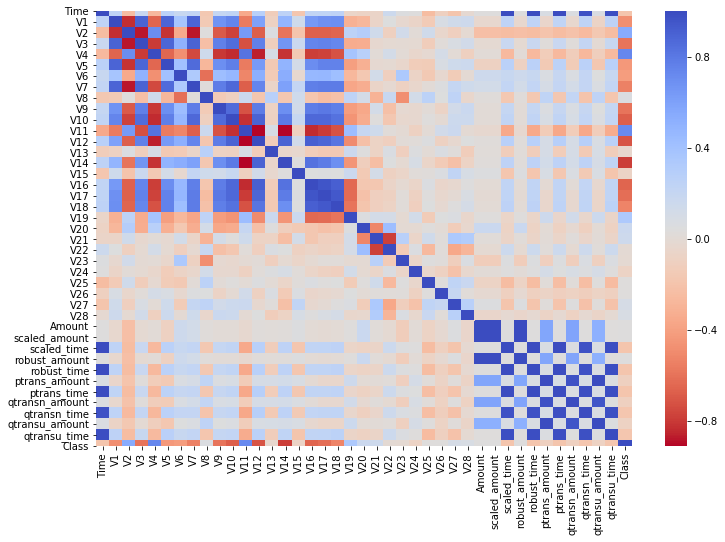

In [67]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df_sm.corr(),  cmap='coolwarm_r', annot=False)

In [68]:
def plot_pos_box(df):
    f, axes = plt.subplots(ncols=4, figsize=(20,7))
    colors = ["#0101DF", "#DF0101"]
    
    sns.boxplot(x="Class", y="V11", data=df, palette=colors, ax=axes[0])
    axes[0].set_title('V11 vs Class Positive Correlation')

    sns.boxplot(x="Class", y="V4", data=df, palette=colors, ax=axes[1])
    axes[1].set_title('V4 vs Class Positive Correlation')

    sns.boxplot(x="Class", y="V2", data=df, palette=colors, ax=axes[2])
    axes[2].set_title('V2 vs Class Positive Correlation')

    sns.boxplot(x="Class", y="V19", data=df, palette=colors, ax=axes[3])
    axes[3].set_title('V19 vs Class Positive Correlation')

    plt.show()

In [69]:
def plot_neg_box(df):
    f, axes = plt.subplots(ncols=5, figsize=(28,7))
    colors = ["#0101DF", "#DF0101"]
    
    sns.boxplot(x="Class", y="V17", data=df, palette=colors, ax=axes[0])
    axes[0].set_title('V17 vs Class Negative Correlation')

    sns.boxplot(x="Class", y="V14", data=df, palette=colors, ax=axes[1])
    axes[1].set_title('V14 vs Class Negative Correlation')

    sns.boxplot(x="Class", y="V12", data=df, palette=colors, ax=axes[2])
    axes[2].set_title('V12 vs Class Negative Correlation')

    sns.boxplot(x="Class", y="V16", data=df, palette=colors, ax=axes[3])
    axes[3].set_title('V16 vs Class Negative Correlation')
    
    sns.boxplot(x="Class", y="V10", data=df, palette=colors, ax=axes[4])
    axes[4].set_title('V10 vs Class Negative Correlation')

    plt.show()

In [70]:
[train_df,train_df_sm,train_df_tkl,train_df_over, train_df_under]

[            Time        V1        V2        V3        V4        V5        V6  \
 0            0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
 1            0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
 2            1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
 3            1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
 4            2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
 ...          ...       ...       ...       ...       ...       ...       ...   
 256416  157680.0 -0.365259  1.097282 -0.372540 -1.061620  0.797929 -0.200417   
 256417  157680.0  1.987485 -0.434937 -0.433414 -0.038342 -0.523486 -0.192562   
 256418  157681.0  2.083357 -0.760339 -0.371132 -0.630823 -1.367181 -1.703394   
 256419  157682.0  0.054815  0.825636  0.221687 -0.614801  0.433114 -1.054786   
 256420  157682.0  1.978151 -0.247286 -2.136886  0.092059  0.891761 -0.084978   
 
               V7        V

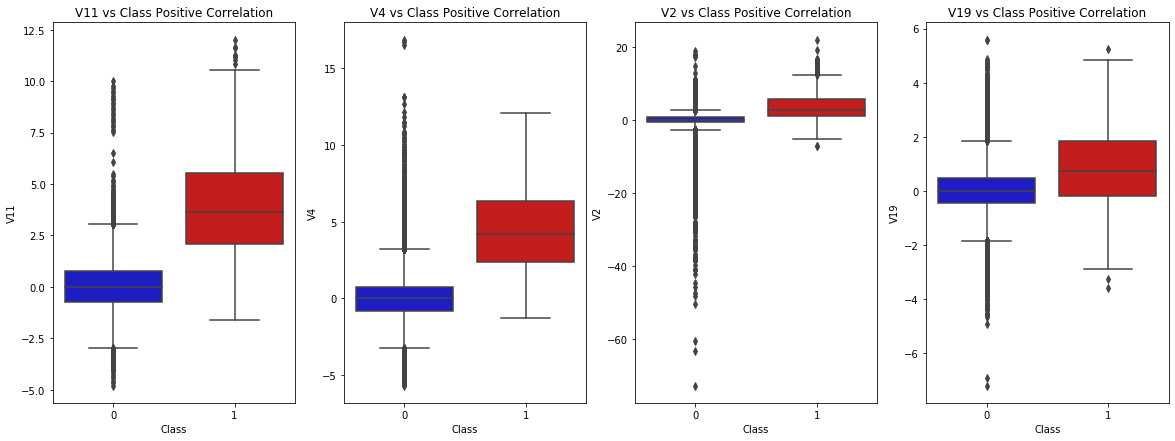

In [71]:
plot_pos_box(train_df)

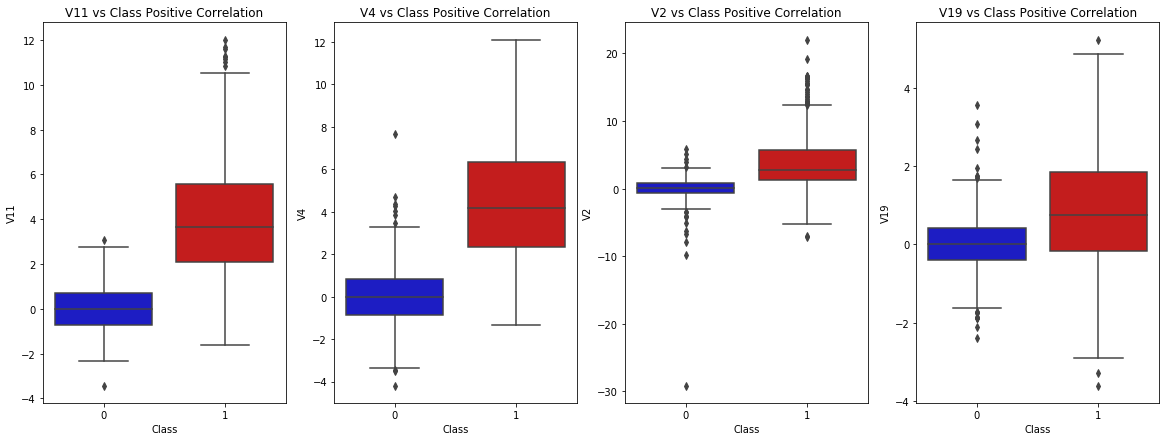

In [72]:
plot_pos_box(train_df_under)

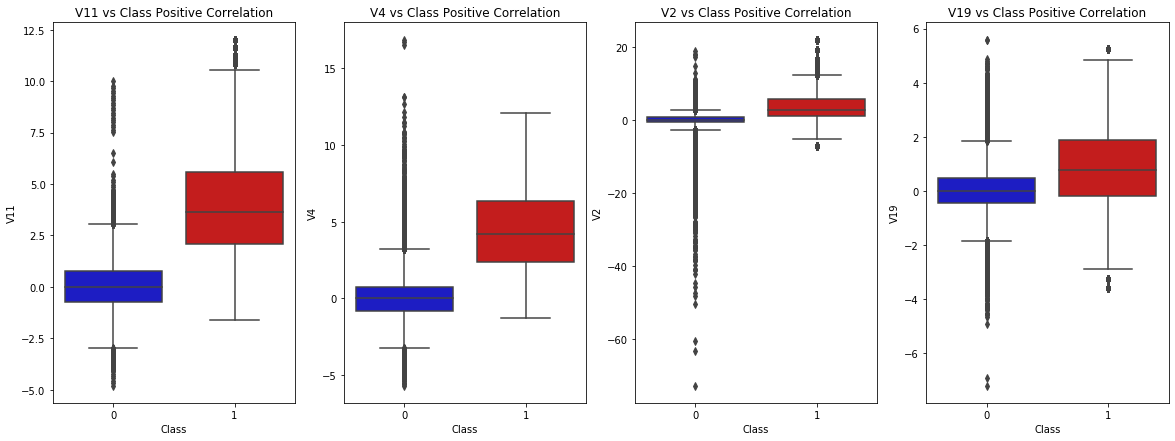

In [73]:
plot_pos_box(train_df_over)

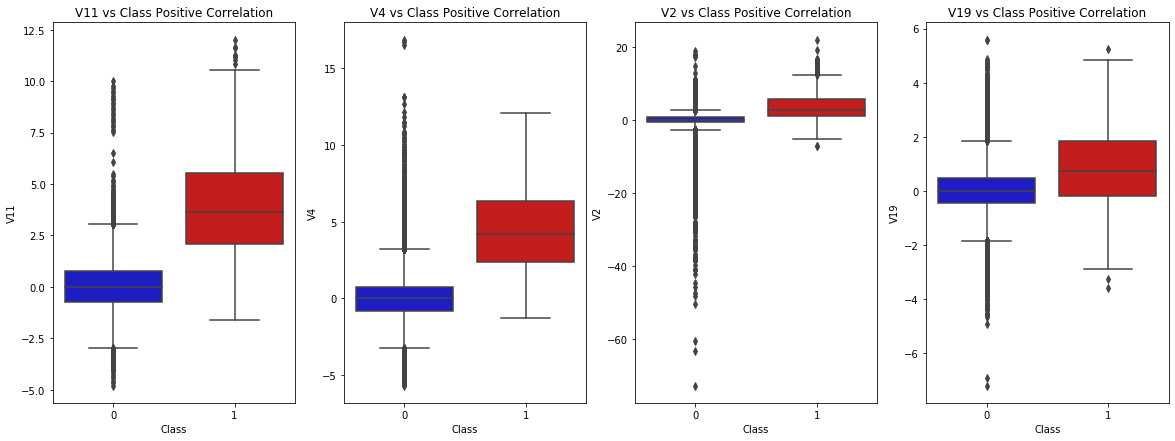

In [74]:
plot_pos_box(train_df_tkl)

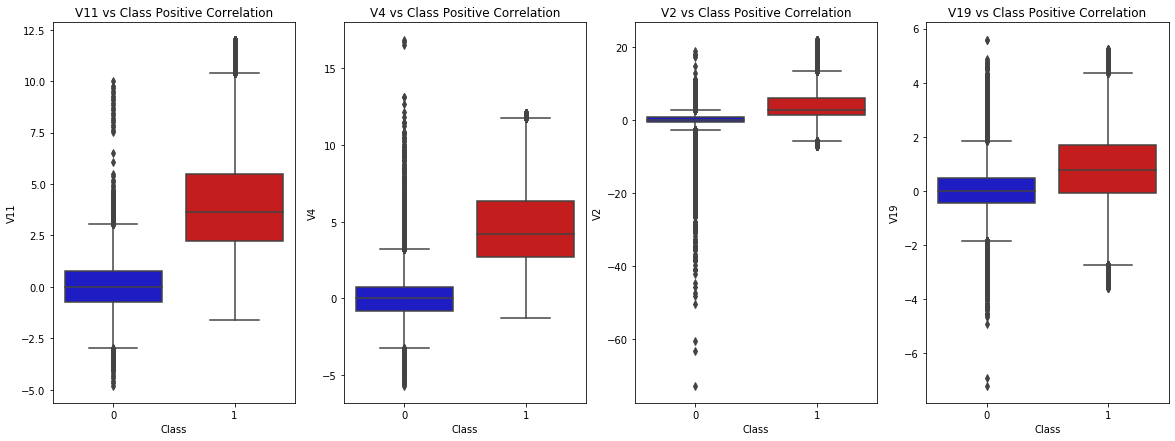

In [75]:
plot_pos_box(train_df_sm)

In [76]:
def plot_scaled_amt(df):
    f, axes = plt.subplots(ncols=5, figsize=(28,7))
    colors = ["#0101DF", "#DF0101"]
    
    sns.boxplot(x="Class", y="scaled_amount", data=df, palette=colors, ax=axes[0])
    axes[0].set_title('Standard Scaling (Amount)')

    sns.boxplot(x="Class", y="robust_amount", data=df, palette=colors, ax=axes[1])
    axes[1].set_title('Robust Scaling (Amount)')

    sns.boxplot(x="Class", y="ptrans_amount", data=df, palette=colors, ax=axes[2])
    axes[2].set_title('Power Transformer (Amount)')

    sns.boxplot(x="Class", y="qtransn_amount", data=df, palette=colors, ax=axes[3])
    axes[3].set_title('Quartile Transformer -Normal (Amount)')
    
    sns.boxplot(x="Class", y="qtransu_amount", data=df, palette=colors, ax=axes[4])
    axes[4].set_title('Quartile Tranformer -Uniform (Amount)')

    plt.show()

In [77]:
def plot_scaled_time(df):
    f, axes = plt.subplots(ncols=5, figsize=(28,7))
    colors = ["#0101DF", "#DF0101"]
    
    sns.boxplot(x="Class", y="scaled_time", data=df, palette=colors, ax=axes[0])
    axes[0].set_title('Standard Scaling (Time)')

    sns.boxplot(x="Class", y="robust_time", data=df, palette=colors, ax=axes[1])
    axes[1].set_title('Robust Scaling (Time)')

    sns.boxplot(x="Class", y="ptrans_time", data=df, palette=colors, ax=axes[2])
    axes[2].set_title('Power Transformer (Time)')

    sns.boxplot(x="Class", y="qtransn_time", data=df, palette=colors, ax=axes[3])
    axes[3].set_title('Quartile Transformer -Normal (Time)')
    
    sns.boxplot(x="Class", y="qtransu_time", data=df, palette=colors, ax=axes[4])
    axes[4].set_title('Quartile Tranformer -Uniform (Time)')

    plt.show()

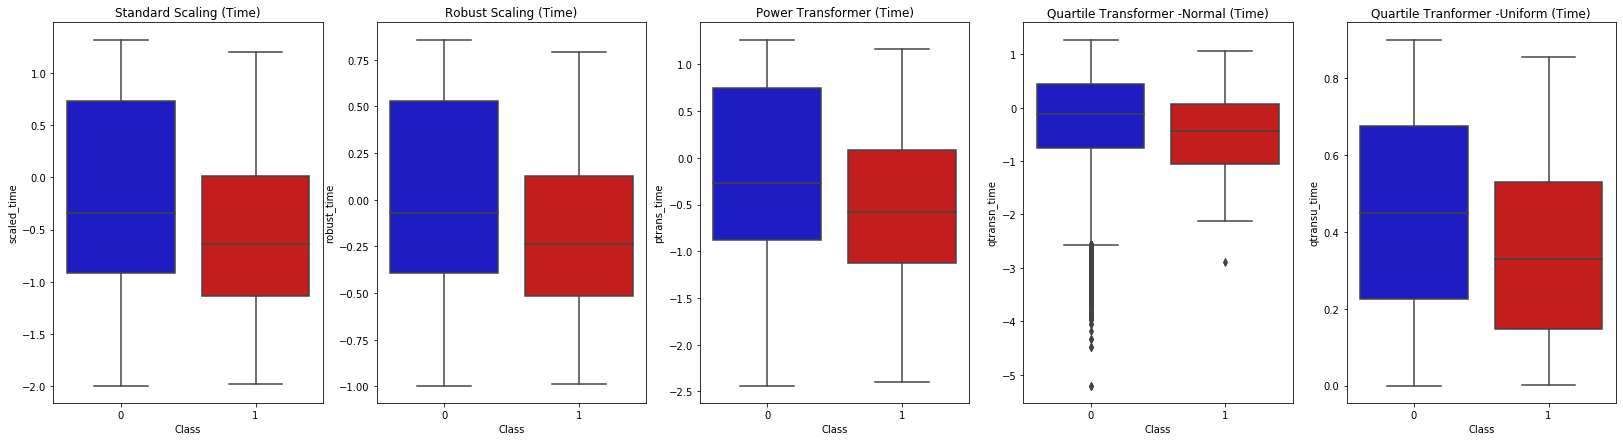

In [78]:
plot_scaled_time(train_df)

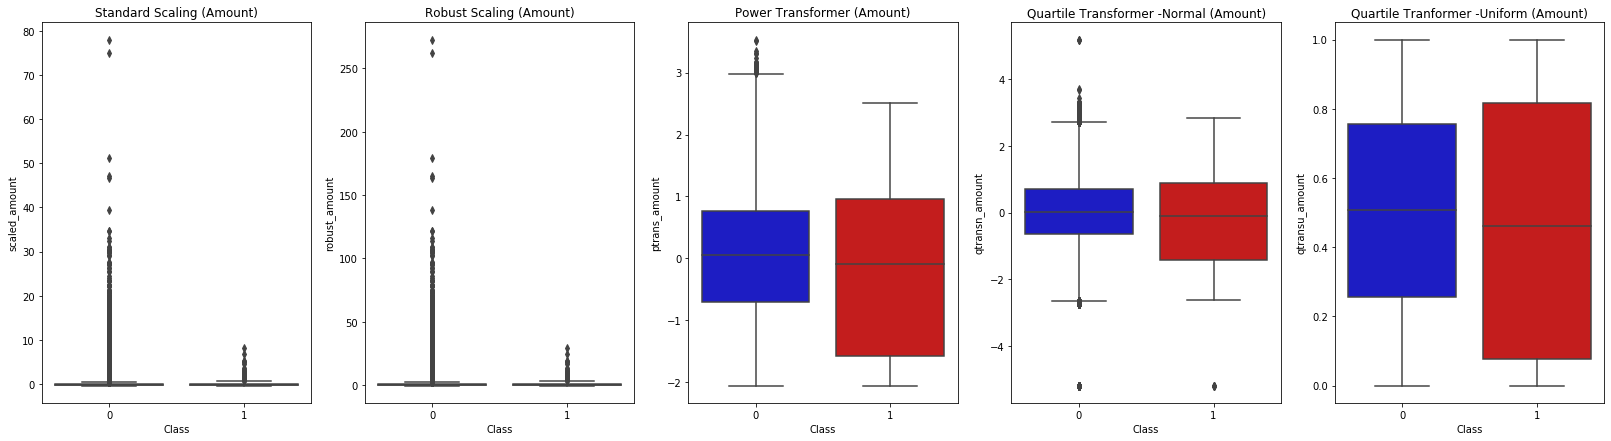

In [79]:
plot_scaled_amt(train_df)

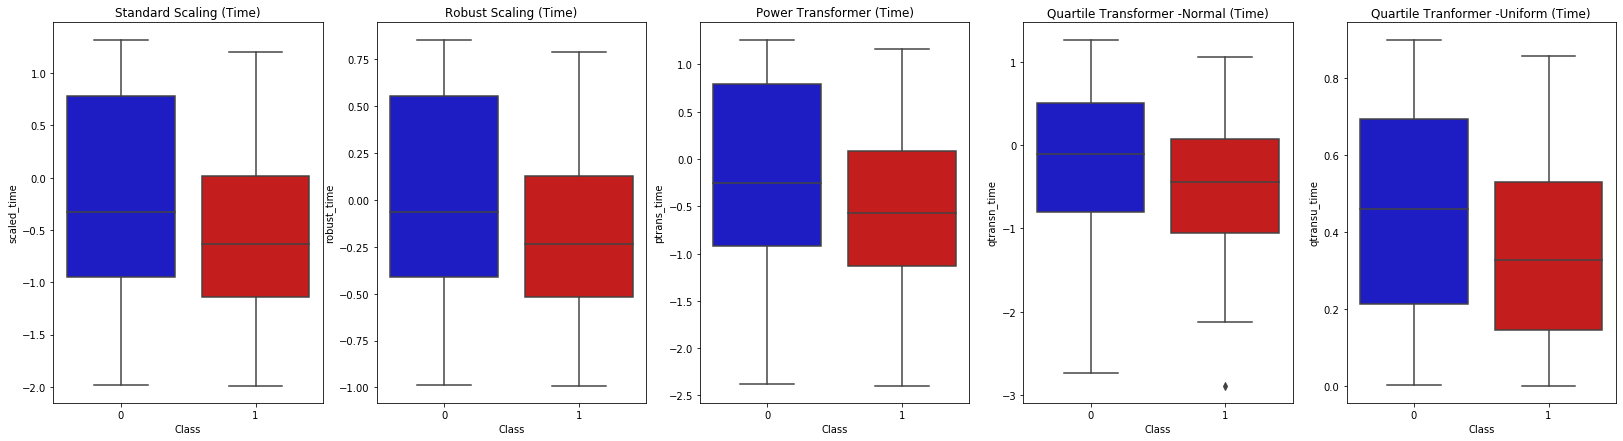

In [80]:
plot_scaled_time(train_df_under)

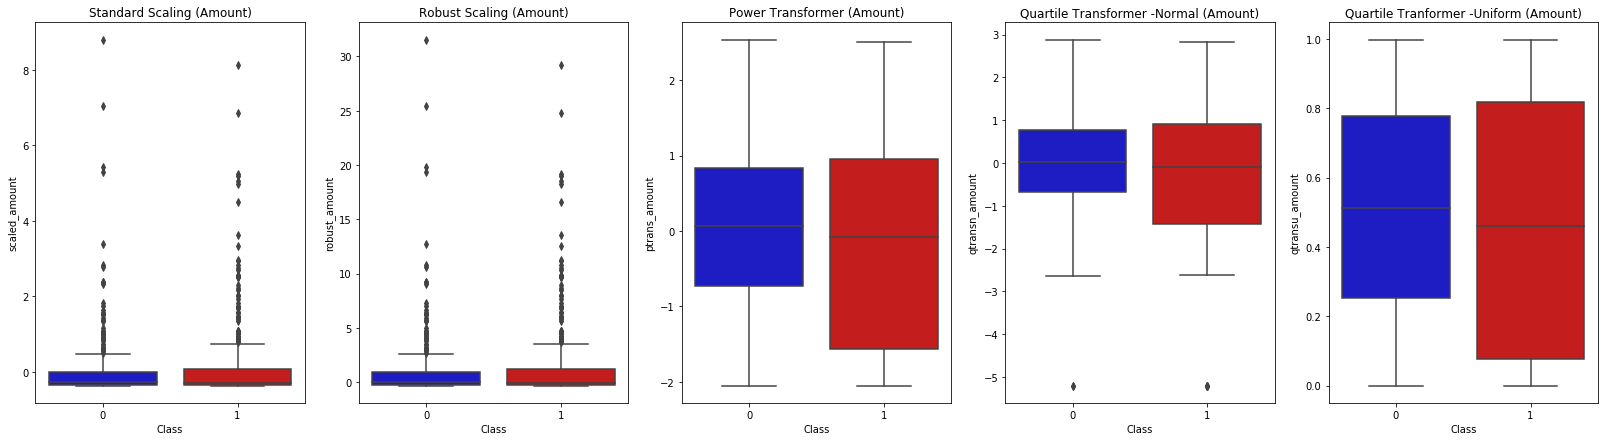

In [81]:
plot_scaled_amt(train_df_under)

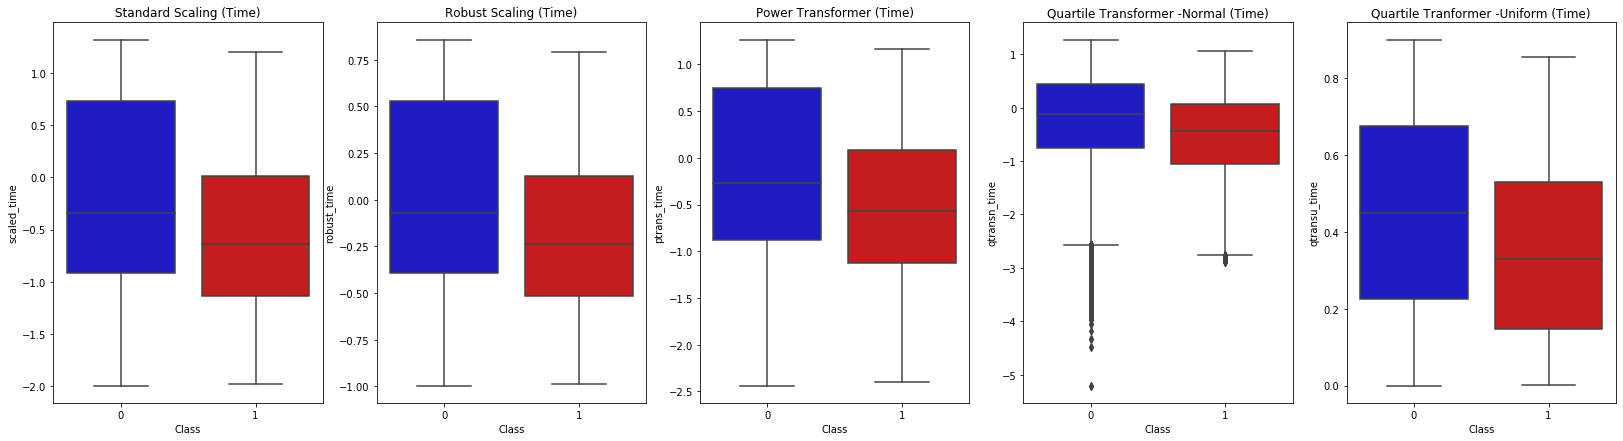

In [82]:
plot_scaled_time(train_df_sm)

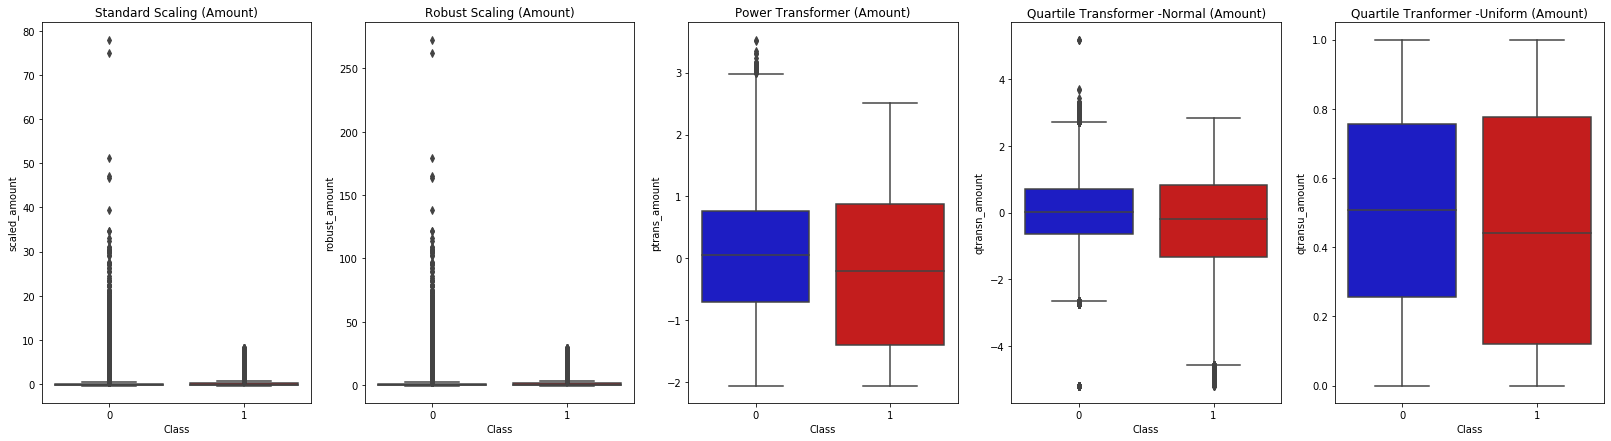

In [83]:
plot_scaled_amt(train_df_sm)

In [84]:
def metric_trap_acc(x=None):
    return 0 #Class 0

In [85]:
train_df_sm.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'scaled_amount', 'scaled_time', 'robust_amount', 'robust_time',
       'ptrans_amount', 'ptrans_time', 'qtransn_amount', 'qtransn_time',
       'qtransu_amount', 'qtransu_time', 'Class'],
      dtype='object')

In [86]:
col_set1 = ["robust_amount", "robust_time", "V2",
            "V4", "V10", "V11", "V12", "V14", "V16", "V17", "V19"]
col_set2 = ["ptrans_amount", "ptrans_time", "V2",
            "V4", "V10", "V11", "V12", "V14", "V16", "V17", "V19"]

In [87]:
X_train_smote_robust = train_df_sm[col_set1]
y_train_smote_robust = train_df_sm["Class"]

X_train_smote_power = train_df_sm[col_set2]
y_train_smote_power = train_df_sm["Class"]

In [88]:
X_train_under_robust = train_df_under[col_set1]
y_train_under_robust = train_df_under["Class"]

X_train_under_power = train_df_under[col_set2]
y_train_under_power = train_df_under["Class"]

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

SVC_Under_Sampling_Power = SVC(shrinking=False, probability=True)
kNN_Under_Sampling_Power = KNeighborsClassifier()

DT_SMOTE_Robust = DecisionTreeClassifier()
LR_SMOTE_Robust = LogisticRegression(max_iter=1000)

In [113]:
SVC_Under_Sampling_Power.fit(X_train_under_power, y_train_under_power)
kNN_Under_Sampling_Power.fit(X_train_under_power, y_train_under_power)

DT_SMOTE_Robust.fit(X_train_smote_robust, y_train_smote_robust)
LR_SMOTE_Robust.fit(X_train_smote_robust, y_train_smote_robust)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
SVC_Under_Sampling_Power

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=False,
    tol=0.001, verbose=False)

In [115]:
kNN_Under_Sampling_Power

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [93]:
DT_SMOTE_Robust

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [94]:
LR_SMOTE_Robust

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
X_test_robust = X_test[col_set1]
X_test_power = X_test[col_set2]

In [118]:
from sklearn.metrics import roc_auc_score

print("ROC Accuracy Score:\n")

print('LR_SMOTE_Robust: ', roc_auc_score(y_test,
                                         LR_SMOTE_Robust.predict_proba(X_test_robust)[:,1]))
print('DT_SMOTE_Robust: ', roc_auc_score(y_test, 
                                         DT_SMOTE_Robust.predict_proba(X_test_robust)[:,1]))
print('kNN_Under_Sampling_Power: ', roc_auc_score(y_test,
                                                  kNN_Under_Sampling_Power.predict_proba(X_test_power)[:,1]))
print('SVC_Under_Sampling_Power: ', roc_auc_score(y_test,
                                                  SVC_Under_Sampling_Power.predict_proba(X_test_power)[:,1]))

ROC Accuracy Score:

LR_SMOTE_Robust:  0.9672841556352365
DT_SMOTE_Robust:  0.5421638247412819
kNN_Under_Sampling_Power:  0.9328843189132074
SVC_Under_Sampling_Power:  0.9770356462621923


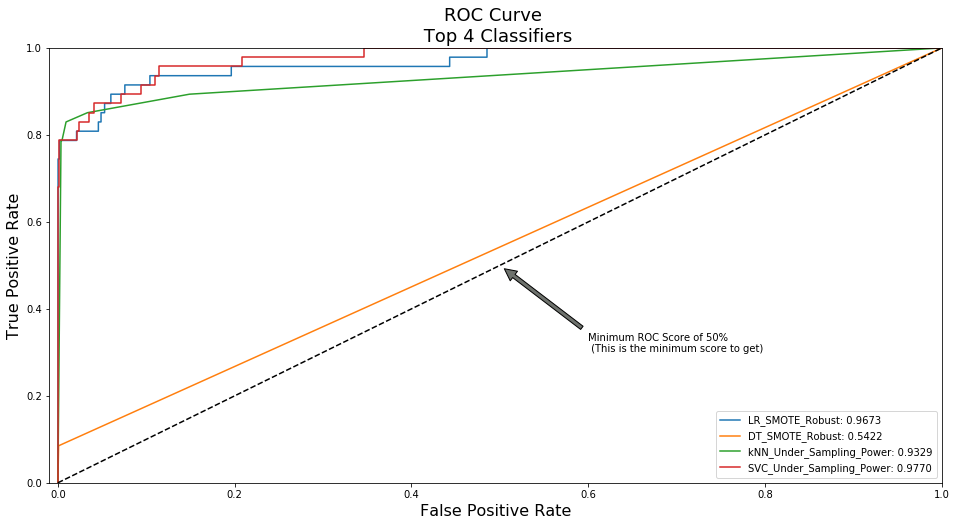

In [129]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, log_thresold = roc_curve(y_test, 
                                           LR_SMOTE_Robust.predict_proba(X_test_robust)[:,1])
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, 
                                                  kNN_Under_Sampling_Power.predict_proba(X_test_power)[:,1])
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, 
                                            SVC_Under_Sampling_Power.predict_proba(X_test_power)[:,1])
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, 
                                               DT_SMOTE_Robust.predict_proba(X_test_robust)[:,1])

plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
plt.plot(log_fpr, log_tpr, 
         label='LR_SMOTE_Robust: {:.4f}'.format( \
             roc_auc_score(y_test, LR_SMOTE_Robust.predict_proba(X_test_robust)[:,1])))
plt.plot(tree_fpr, tree_tpr, 
         label='DT_SMOTE_Robust: {:.4f}'.format( \
             roc_auc_score(y_test, DT_SMOTE_Robust.predict_proba(X_test_robust)[:,1])))
plt.plot(knear_fpr, knear_tpr, 
         label='kNN_Under_Sampling_Power: {:.4f}'.format( \
             roc_auc_score(y_test, kNN_Under_Sampling_Power.predict_proba(X_test_power)[:,1])))
plt.plot(svc_fpr, svc_tpr, 
         label='SVC_Under_Sampling_Power: {:.4f}'.format( \
             roc_auc_score(y_test, SVC_Under_Sampling_Power.predict_proba(X_test_power)[:,1])))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50%', xy=(0.5, 0.5), xytext=(0.6, 0.3),
            arrowprops=dict(facecolor='#6E726D', shrink=0.05),)
plt.legend()
plt.show()

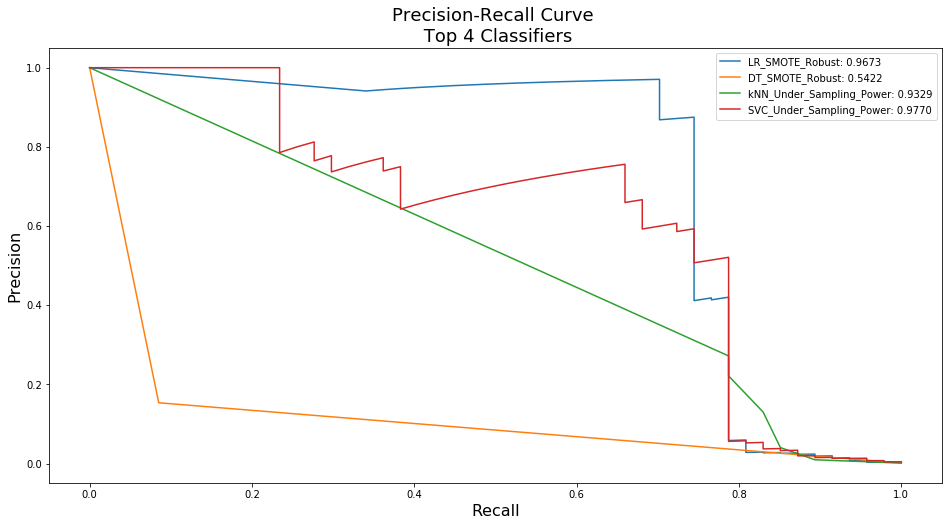

In [161]:
from sklearn.metrics import precision_recall_curve

log_tpr, log_fpr, log_thresold = precision_recall_curve(y_test, 
                                           LR_SMOTE_Robust.predict_proba(X_test_robust)[:,1])
knear_tpr, knear_fpr, knear_threshold = precision_recall_curve(y_test, 
                                                  kNN_Under_Sampling_Power.predict_proba(X_test_power)[:,1])
svc_tpr, svc_fpr, svc_threshold = precision_recall_curve(y_test, 
                                            SVC_Under_Sampling_Power.predict_proba(X_test_power)[:,1])
tree_tpr, tree_fpr, tree_threshold = precision_recall_curve(y_test, 
                                               DT_SMOTE_Robust.predict_proba(X_test_robust)[:,1])

plt.figure(figsize=(16,8))
plt.title('Precision-Recall Curve \n Top 4 Classifiers', fontsize=18)
plt.plot(log_fpr, log_tpr, 
         label='LR_SMOTE_Robust: {:.4f}'.format( \
             roc_auc_score(y_test, LR_SMOTE_Robust.predict_proba(X_test_robust)[:,1])))
plt.plot(tree_fpr, tree_tpr, 
         label='DT_SMOTE_Robust: {:.4f}'.format( \
             roc_auc_score(y_test, DT_SMOTE_Robust.predict_proba(X_test_robust)[:,1])))
plt.plot(knear_fpr, knear_tpr, 
         label='kNN_Under_Sampling_Power: {:.4f}'.format( \
             roc_auc_score(y_test, kNN_Under_Sampling_Power.predict_proba(X_test_power)[:,1])))
plt.plot(svc_fpr, svc_tpr, 
         label='SVC_Under_Sampling_Power: {:.4f}'.format( \
             roc_auc_score(y_test, SVC_Under_Sampling_Power.predict_proba(X_test_power)[:,1])))
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.legend()
plt.show()

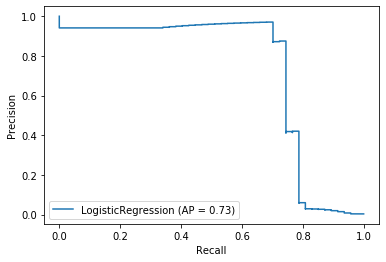

In [160]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(LR_SMOTE_Robust, X_test_robust, y_test)

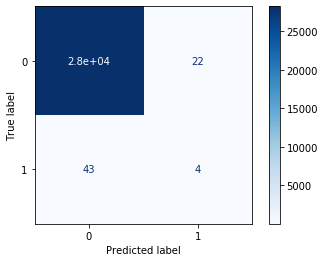

In [148]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(DT_SMOTE_Robust, X_test_robust, y_test,cmap=plt.cm.Blues)

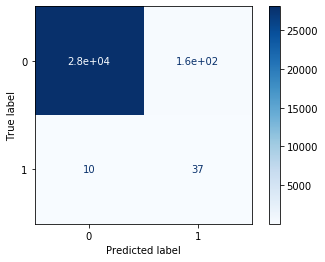

In [149]:
plot_confusion_matrix(LR_SMOTE_Robust, X_test_robust, y_test,cmap=plt.cm.Blues)

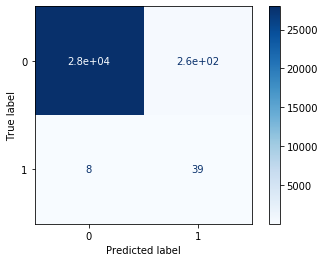

In [150]:
plot_confusion_matrix(kNN_Under_Sampling_Power, X_test_power, y_test,cmap=plt.cm.Blues)

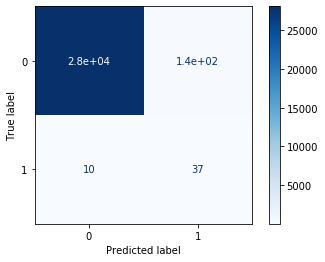

In [153]:
plot_confusion_matrix(SVC_Under_Sampling_Power, X_test_power, y_test, cmap=plt.cm.Blues)

In [140]:
from sklearn.metrics import classification_report

print('LR_SMOTE_Robust:')
print(classification_report(y_test, LR_SMOTE_Robust.predict(X_test_robust)))

print('DT_SMOTE_Robust:')
print(classification_report(y_test, DT_SMOTE_Robust.predict(X_test_robust)))

print('SVC_Under_Sampling_Power:')
print(classification_report(y_test, SVC_Under_Sampling_Power.predict(X_test_power)))

print('kNN_Under_Sampling_Power:')
print(classification_report(y_test, kNN_Under_Sampling_Power.predict(X_test_power)))

(28298, 11) (28298,)
0    28251
1       47
Name: Class, dtype: int64
LR_SMOTE_Robust:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28251
           1       0.19      0.79      0.30        47

    accuracy                           0.99     28298
   macro avg       0.59      0.89      0.65     28298
weighted avg       1.00      0.99      1.00     28298

DT_SMOTE_Robust:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28251
           1       0.15      0.09      0.11        47

    accuracy                           1.00     28298
   macro avg       0.58      0.54      0.55     28298
weighted avg       1.00      1.00      1.00     28298

SVC_Under_Sampling_Power:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28251
           1       0.20      0.79      0.32        47

    accuracy                           0.99     28298